In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pytorch_lightning as pl

import train

In [4]:
def plot_relevant_part(lr_finder):
    loss = np.array(lr_finder.results['loss'])
    lr = np.array(lr_finder.results['lr'])
    mask = loss < 1
    loss = loss[mask]
    lr = lr[mask]
    fig, ax = plt.subplots()
    ax.plot(lr, loss)
    ax.set_xscale("log")
    ax.set_xlabel("Learning rate")
    ax.set_ylabel("Loss")
    _ = lr_finder.suggestion()
    ax.plot(lr[lr_finder._optimal_idx], loss[lr_finder._optimal_idx], markersize=10, marker='o', color='red')
    plt.show()

In [6]:
# lr_finders = []
for _ in range(3):
    trainer = pl.Trainer(gpus=1)
    lr_finder = trainer.tuner.lr_find(model=train.model, train_dataloader=train.train_dl, val_dataloaders=train.valid_dl)
    lr_finders.append(lr_finder)
    # fig = lr_finder.plot(suggest=True)
    # fig.show()
#     p = plot_relevant_part(lr_finder)
#     plots.append(p)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores

  | Name  | Type      | Params
------------------------------------
0 | model | MULTModel | 1.1 M 
------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.405     Total estimated model params size (MB)


LR finder stopped early due to diverging loss.
Restored states from the checkpoint file at /workspace/transformer/lr_find_temp_model.ckpt
GPU available: True, used: True
TPU available: None, using: 0 TPU cores

  | Name  | Type      | Params
------------------------------------
0 | model | MULTModel | 1.1 M 
------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.405     Total estimated model params size (MB)


LR finder stopped early due to diverging loss.
Restored states from the checkpoint file at /workspace/transformer/lr_find_temp_model.ckpt
GPU available: True, used: True
TPU available: None, using: 0 TPU cores

  | Name  | Type      | Params
------------------------------------
0 | model | MULTModel | 1.1 M 
------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.405     Total estimated model params size (MB)


LR finder stopped early due to diverging loss.
Restored states from the checkpoint file at /workspace/transformer/lr_find_temp_model.ckpt


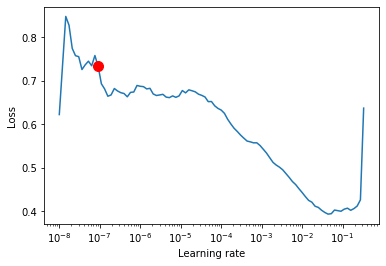

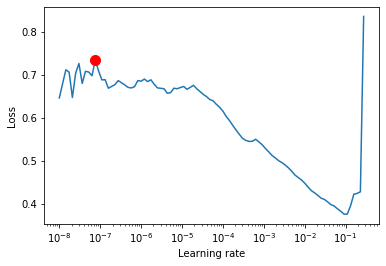

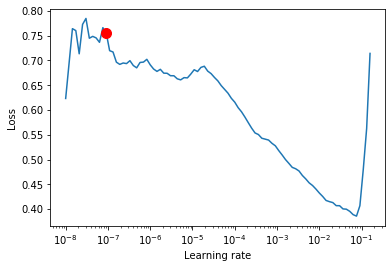

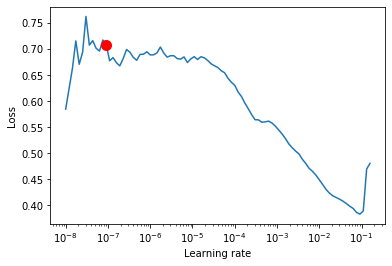

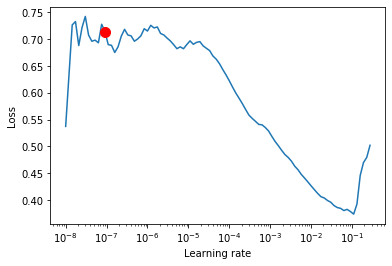

In [7]:
for lr_finder in lr_finders:
    plot_relevant_part(lr_finder)

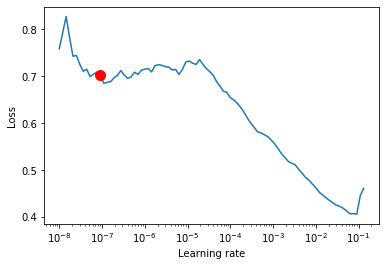

In [37]:
p = plot_relevant_part(lr_finder)

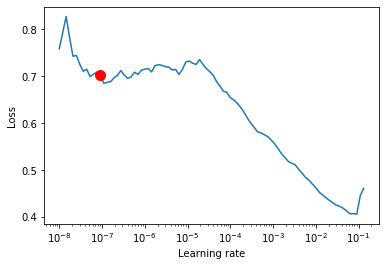

In [38]:
p

In [3]:
res = trainer.tune(model=train.model, train_dataloader=train.train_dl, val_dataloaders=train.valid_dl)


  | Name  | Type      | Params
------------------------------------
0 | model | MULTModel | 1.1 M 
------------------------------------
1.1 M     Trainable params
0         Non-trainable params
1.1 M     Total params
4.405     Total estimated model params size (MB)
/opt/conda/lib/python3.7/site-packages/pytorch_lightning/utilities/distributed.py:50: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 32 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)
/workspace/transformer/modules/position_embedding.py:23: UserWarning: The number of elements in the out tensor of shape [60] is 60 which does not match the computed number of elements 1526. Note that this may occur as a result of rounding error. The out tensor will be resized to a tensor of shape (1526,). (Triggered internally at  /pytorch/aten/src

LR finder stopped early due to diverging loss.
Restored states from the checkpoint file at /workspace/transformer/lr_find_temp_model.ckpt
Learning rate set to 9.120108393559096e-08


In [5]:
res